# Artificial Neural Nework for Churn Prediction

In This module, we will create build up a deep learning model for the churn prediction. We will see the performance of this model on the imbalance dataset, and also on the resampled dataset through metrics such as Precision, Recall, F1-Score, roc_auc_score, and the model accuracy. Using confusion matrix, we will also observe how much of churners this model can capture compare to the traditional machine learning model, Gradient Boost.

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [11]:
# get datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv("y_train.csv").squeeze()
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

In [12]:
X_train.shape, y_train.shape

((7500, 12), (7500,))

## Setting up model for imbalance dataset

In [13]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [14]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True)]
    )

Epoch 1/100


235/235 [==============================] - 8s 13ms/step - loss: 0.6631 - accuracy: 0.6584 - precision: 0.2663 - recall: 0.3855 - val_loss: 0.5128 - val_accuracy: 0.7976 - val_precision: 0.7143 - val_recall: 0.0098
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.5273 - accuracy: 0.7629 - precision: 0.3596 - recall: 0.2094 - val_loss: 0.4561 - val_accuracy: 0.8044 - val_precision: 0.6471 - val_recall: 0.0864
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.4832 - accuracy: 0.7864 - precision: 0.4353 - recall: 0.1630 - val_loss: 0.4323 - val_accuracy: 0.8172 - val_precision: 0.7766 - val_recall: 0.1434
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.4649 - accuracy: 0.7944 - precision: 0.4873 - recall: 0.1760 - val_loss: 0.4223 - val_accuracy: 0.8172 - val_precision: 0.7407 - val_recall: 0.1572
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.4528 - accuracy: 0.8

79/79 [==============================] - 1s 5ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1991
           1       0.75      0.43      0.55       509

    accuracy                           0.86      2500
   macro avg       0.81      0.70      0.73      2500
weighted avg       0.85      0.86      0.84      2500



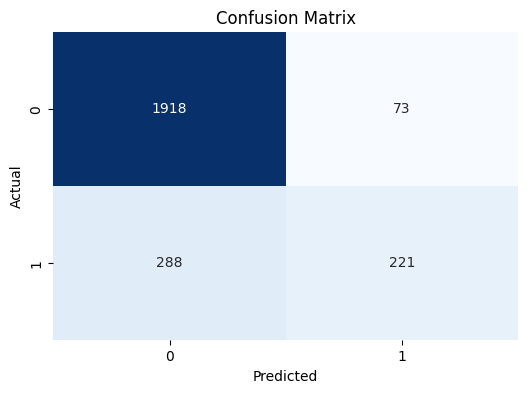

C:\Users\USER\AppData\Local\Temp\ipykernel_5316\527153291.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='grey')


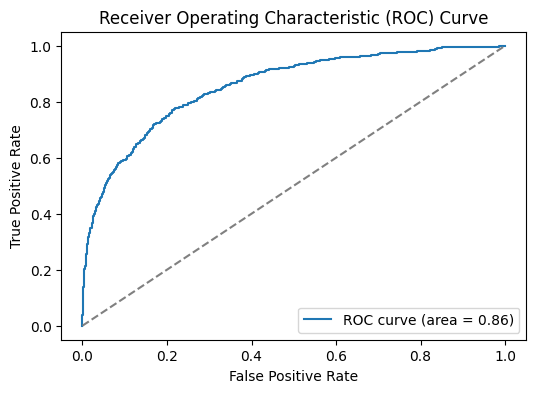

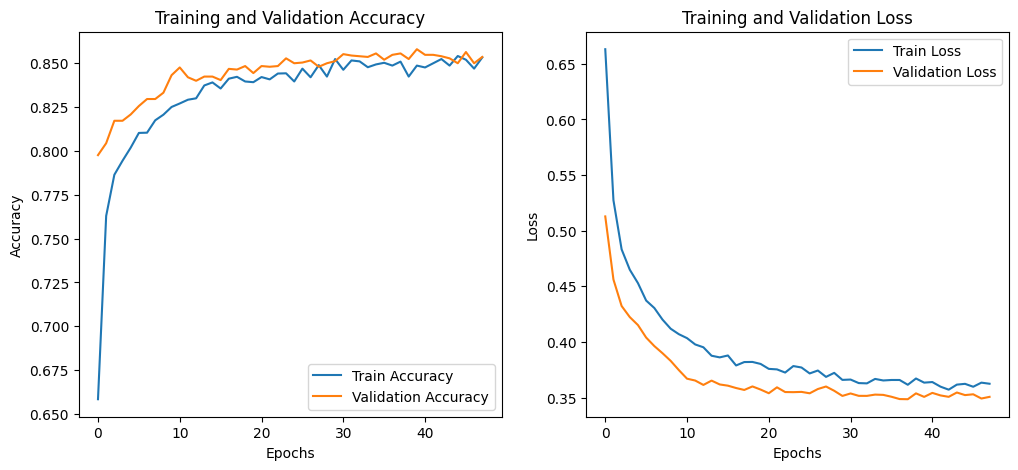

In [ ]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Training history
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

We set up a ANN model first layer as dense layer with 64 neurons fully connected to the input. Each BatchNormalization that follows helps the model to normalize activations, and stabilizes training. Each dropout layer that follows randomly drops 30% of neuronsduring training to prevent overfitting. Lastly a dense layer with sigmoid activation function which output churn probability between 0 and 1.

From the classification report, the ANN model slightly performs better on the imbalanced dataset than the gradient boost with a recall score of 43%, and an ROC score of 86%. From the Confusion Matrix we see that the ANN model was able capture 221 churners out 509 churners, this is 4 more chuners than gradient boost was able to capture (217 churners). It is quite a slight different but it was able save reveal4 more customers that would leave the business. From the Training and Validation Accuracy plot, we see the validation and training line of plot following the same path, this indicates that the model trained without overfitting.

## Setting up model for Resampled Dataset

In [22]:
X_train_res = pd.read_csv('X_train_resampled.csv')
y_train_res = pd.read_csv("y_train_resampled.csv").squeeze()

In [19]:
# Build the model
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [21]:
model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

In [23]:
history_2 = model_2.fit(
    X_train_res, y_train_res,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True)]
    )

Epoch 1/100
374/374 [==============================] - 9s 10ms/step - loss: 0.7234 - accuracy: 0.5984 - precision_1: 0.5899 - recall_1: 0.6457 - val_loss: 0.7061 - val_accuracy: 0.4972 - val_precision_1: 0.2725 - val_recall_1: 0.8802
Epoch 2/100
374/374 [==============================] - 3s 8ms/step - loss: 0.6316 - accuracy: 0.6544 - precision_1: 0.6385 - recall_1: 0.7117 - val_loss: 0.5814 - val_accuracy: 0.6732 - val_precision_1: 0.3574 - val_recall_1: 0.7583
Epoch 3/100
374/374 [==============================] - 3s 8ms/step - loss: 0.5853 - accuracy: 0.6942 - precision_1: 0.6826 - recall_1: 0.7261 - val_loss: 0.5241 - val_accuracy: 0.7372 - val_precision_1: 0.4155 - val_recall_1: 0.7151
Epoch 4/100
374/374 [==============================] - 3s 7ms/step - loss: 0.5588 - accuracy: 0.7223 - precision_1: 0.7177 - recall_1: 0.7329 - val_loss: 0.5242 - val_accuracy: 0.7364 - val_precision_1: 0.4212 - val_recall_1: 0.7878
Epoch 5/100
374/374 [==============================] - 3s 7ms/step 

79/79 [==============================] - 1s 4ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1991
           1       0.56      0.63      0.59       509

    accuracy                           0.82      2500
   macro avg       0.73      0.75      0.74      2500
weighted avg       0.83      0.82      0.83      2500



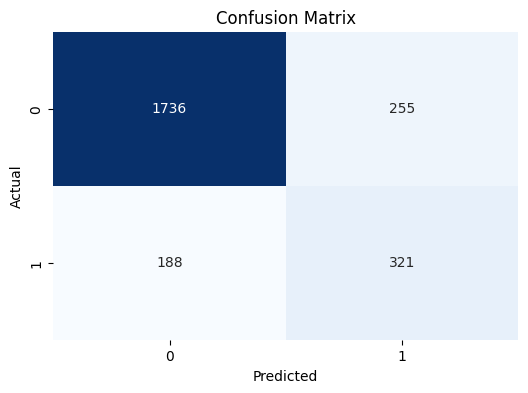

C:\Users\USER\AppData\Local\Temp\ipykernel_5316\4290196671.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='grey')


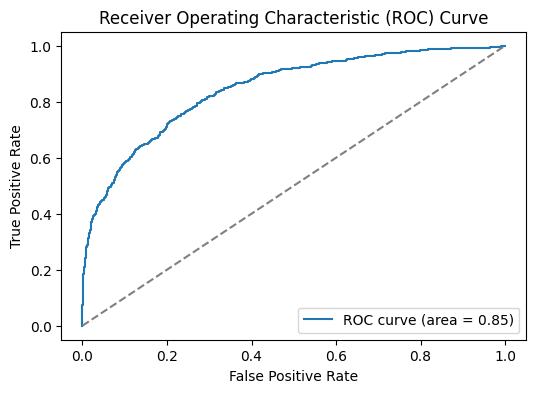

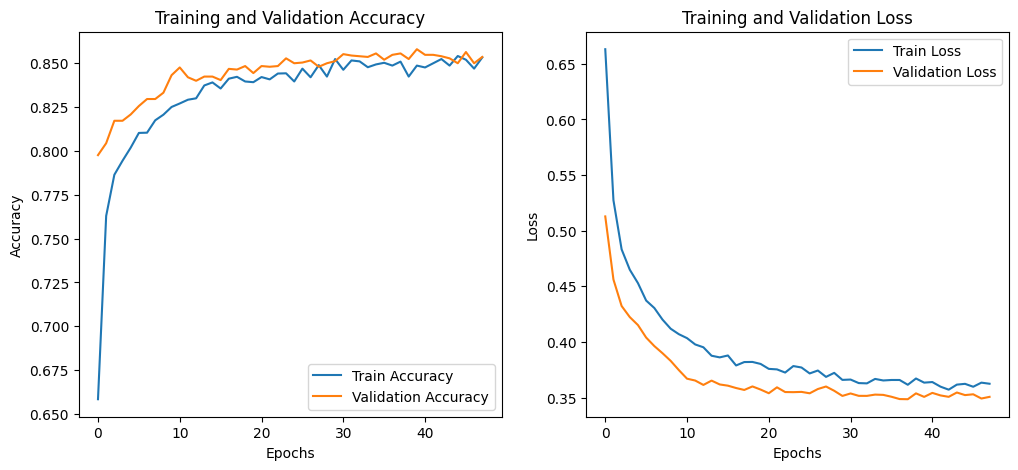

In [25]:
# Predictions
y_pred_prob = model_2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Training history
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()